Random Forest RMSE: 991.5999987802539
7/7 [==============================] - 0s 2ms/step
Neural Network RMSE: 926.9778898300589


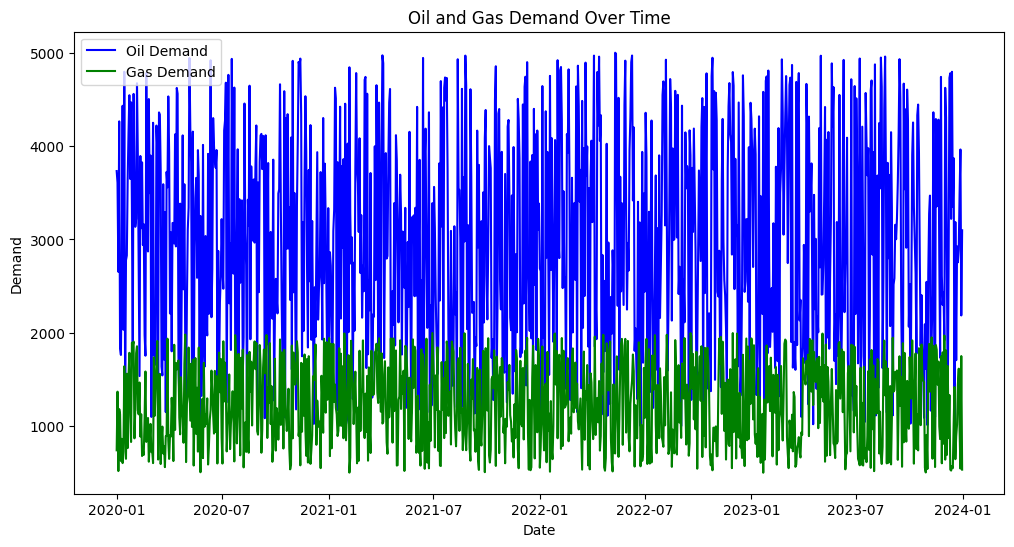

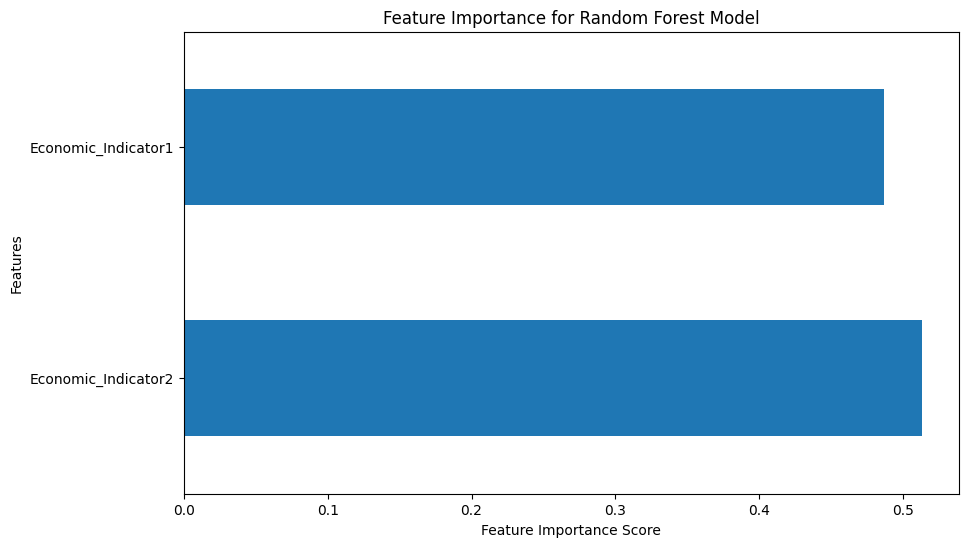

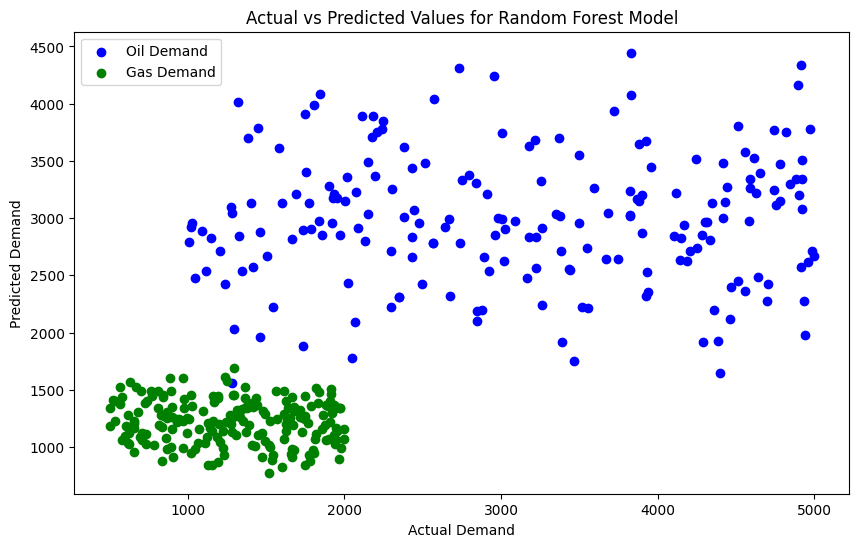

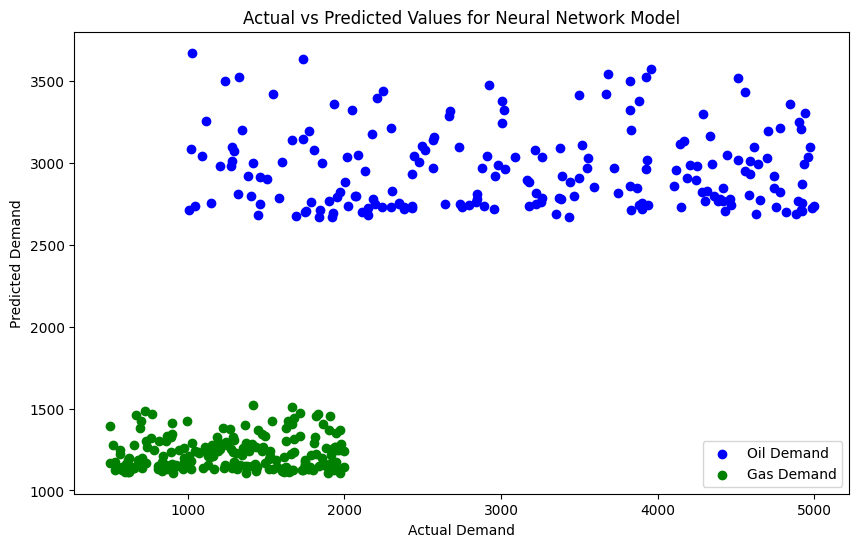

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


np.random.seed(0)  # for reproducibility

# Create a DataFrame with random data
num_samples = 1000
dates = pd.date_range(start='2020-01-01', end='2023-12-31', periods=num_samples)
oil_demand = np.random.randint(1000, 5000, size=num_samples)
gas_demand = np.random.randint(500, 2000, size=num_samples)
economic_indicator1 = np.random.rand(num_samples) * 100
economic_indicator2 = np.random.rand(num_samples) * 200

data = pd.DataFrame({
    'Date': dates,
    'Oil_Demand': oil_demand,
    'Gas_Demand': gas_demand,
    'Economic_Indicator1': economic_indicator1,
    'Economic_Indicator2': economic_indicator2
})

# Preprocess data

data.dropna(inplace=True)

# Split data into features and target variable
X = data.drop(columns=['Date', 'Oil_Demand', 'Gas_Demand'])
y = data[['Oil_Demand', 'Gas_Demand']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Evaluate Random Forest model
rf_predictions = rf_model.predict(X_test_scaled)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
print("Random Forest RMSE:", rf_rmse)

# Define a simple neural network model
def create_nn_model(input_shape):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[input_shape]),
        layers.Dense(32, activation='relu'),
        layers.Dense(2)  # Output layer for oil and gas demand
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

# Create and train neural network model
nn_model = create_nn_model(X_train_scaled.shape[1])
nn_model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=0)







# Evaluate neural network model
nn_predictions = nn_model.predict(X_test_scaled)
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_predictions))
print("Neural Network RMSE:", nn_rmse)

# Plot oil and gas demand over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Oil_Demand'], label='Oil Demand', color='blue')
plt.plot(data['Date'], data['Gas_Demand'], label='Gas Demand', color='green')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Oil and Gas Demand Over Time')
plt.legend()
plt.show()

# Plot feature importance for Random Forest model
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Random Forest Model')
plt.show()

# Plot actual vs predicted values for Random Forest model
plt.figure(figsize=(10, 6))
plt.scatter(y_test['Oil_Demand'], rf_predictions[:, 0], label='Oil Demand', color='blue')
plt.scatter(y_test['Gas_Demand'], rf_predictions[:, 1], label='Gas Demand', color='green')
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.title('Actual vs Predicted Values for Random Forest Model')
plt.legend()
plt.show()

# Plot actual vs predicted values for Neural Network model
plt.figure(figsize=(10, 6))
plt.scatter(y_test['Oil_Demand'], nn_predictions[:, 0], label='Oil Demand', color='blue')
plt.scatter(y_test['Gas_Demand'], nn_predictions[:, 1], label='Gas Demand', color='green')
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.title('Actual vs Predicted Values for Neural Network Model')
plt.legend()
plt.show()

